In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression



train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


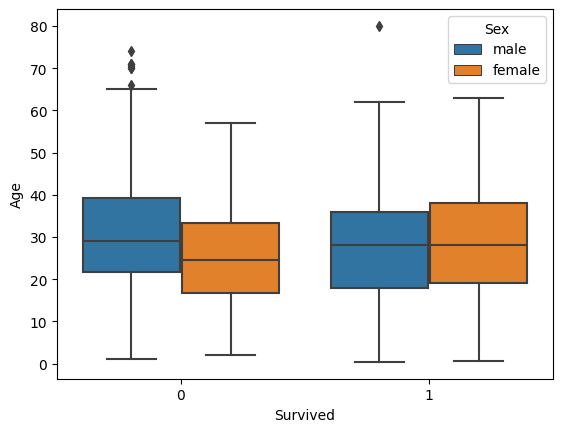

In [2]:
sns.boxplot(data=train_data, y = 'Age', x = 'Survived', hue = 'Sex')
plt.show()

In [3]:
sur = train_data[train_data['Survived'] == 1] 
sur[sur['Sex'] == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [4]:
female = sum(sur[sur['Sex'] == 'female']['Survived'])/ len(train_data[train_data['Sex'] == 'female'])
male = sum(sur[sur['Sex'] == 'male']['Survived'])/ len(train_data[train_data['Sex'] == 'male'])
print(f'Percentage of Woman that survived {female*100:.2f}')
print(f'Percentage of Man that survived {male*100:.2f}')

Percentage of Woman that survived 74.20
Percentage of Man that survived 18.89


In [5]:
for column in train_data.columns:
    print(column,':',sum(train_data[column].isna()))



PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


In [6]:
for column in test_data.columns:
    print(column,':',sum(test_data[column].isna()))



PassengerId : 0
Pclass : 0
Name : 0
Sex : 0
Age : 86
SibSp : 0
Parch : 0
Ticket : 0
Fare : 1
Cabin : 327
Embarked : 0


In [7]:
#Since over 600 values are missing for cabin just drop the column and name and ticket
test_data = test_data.drop(['Cabin','Name'], axis=1)
#Drop the name also since its irrelvant as we have the passagerID

#Take the mean age by Pclass  and replace nan values with that
mean_age = test_data.groupby('Pclass')['Age'].mean()
test_data['Age'] = test_data.apply(lambda row: mean_age[row['Pclass']] if np.isnan(row['Age']) else row['Age'], axis=1)

#For missing value
test_data[test_data['Fare'].isna()] = test_data[test_data['Pclass']==3]['Fare'].mean()

In [8]:
#Since over 600 values are missing for cabin just drop the column and name and ticket
train_data = train_data.drop(['Cabin','Name'], axis=1)
#Drop the name also since its irrelvant as we have the passagerID

#Take the mean age by Pclass  and replace nan values with that
mean_age = train_data.groupby('Pclass')['Age'].mean()
train_data['Age'] = train_data.apply(lambda row: mean_age[row['Pclass']] if np.isnan(row['Age']) else row['Age'], axis=1)


In [9]:
train_data[train_data['Embarked'].isna()]
train_data = train_data.dropna(subset='Embarked', how='any', inplace=False)
#train_data.drop(train_data[train_data['Embarked'].isna()])

In [10]:
test_data.select_dtypes(include=['object', 'category'])


,Sex,Ticket,Embarked
0,male,330911,Q
1,female,363272,S
2,male,240276,Q
3,male,315154,S
4,female,3101298,S
...,...,...,...
413,male,A.5. 3236,S
414,female,PC 17758,C
415,male,SOTON/O.Q. 3101262,S
416,male,359309,S


In [11]:
test_data['Sex'] = test_data['Sex'].astype(str)
test_data['Embarked'] = test_data['Embarked'].astype(str)
test_data['Ticket'] = test_data['Ticket'].astype(str)


In [12]:
quant = train_data[['Sex', 'Embarked', 'Ticket']]
label_encoder = LabelEncoder()
for i in quant.columns:
    train_data[i] = label_encoder.fit_transform(train_data[i])

label_encoder = LabelEncoder()
for i in quant.columns:
    test_data[i] = label_encoder.fit_transform(test_data[i])

In [13]:
y_train, X_train, = train_data['Survived'],train_data.drop('Survived',axis=1)

In [14]:
print('Resampled dataset shape %s' % len(X_train))
ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % len(X_train))


Resampled dataset shape 889
Resampled dataset shape 1098


In [15]:
y_test, X_test = pd.read_csv('/kaggle/input/titanic/gender_submission.csv'), test_data
y_test = y_test['Survived'].to_numpy().reshape(-1,1)


Random Forest Accuracy: 61.72%
RF  F1 Score: 22.33%


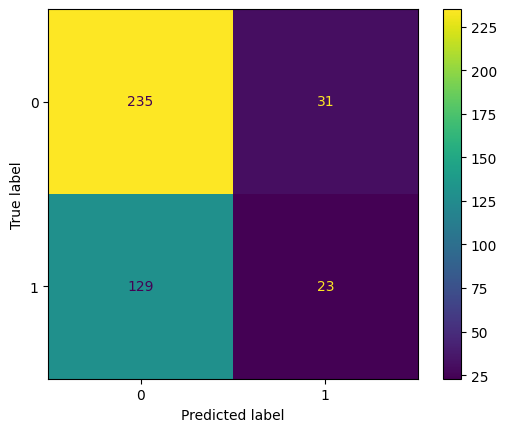

In [16]:
rf = RandomForestClassifier(n_estimators=100,max_depth=30, random_state=1,bootstrap=True) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy*100:.2f}%')
print(f'RF  F1 Score: {f1_score(y_test, y_pred)*100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

Logistic Regression Accuracy: 71.29%
Logistic Regression F1 Score: 42.31%


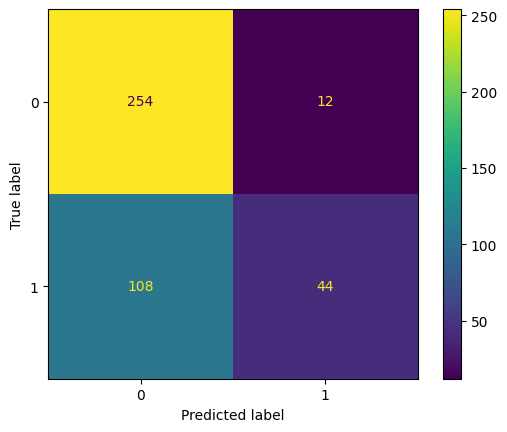

In [17]:
classifier = LogisticRegression(max_iter=10000, C=0.01, random_state=1)
classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred2 = classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Logistic Regression Accuracy: {accuracy*100:.2f}%')
print(f'Logistic Regression F1 Score: {f1_score(y_test, y_pred2)*100:.2f}%')

cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [18]:
test_data[test_data["PassengerId"]==12.459678]['PassengerId'] = 1044.0
test_data.iloc[152]

PassengerId    12.459678
Pclass         12.459678
Sex             0.000000
Age            12.459678
SibSp          12.459678
Parch          12.459678
Ticket         31.000000
Fare           12.459678
Embarked        0.000000
Name: 152, dtype: float64

In [19]:
test_data['PassengerId'] = test_data['PassengerId'].astype(int)

test_data['PassengerId'] = test_data['PassengerId'].astype('Int32')


In [20]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred2})
output.to_csv('submission(2).csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [21]:
df= pd.read_csv('/kaggle/working/submission(2).csv')
df.iloc[152] = (1044,0)
df[df['PassengerId']>1043]
df.to_csv('submission(2).csv', index=False)
